In [4]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sb
import plotly.plotly as py
from plotly.graph_objs import * 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [5]:
dt= pd.read_csv('2008.csv')

In [6]:
dt.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [7]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


From the described data , column have complete data is :Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted.
Column have same number of available info is:CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay.

In [8]:
dt['UniqueCarrier'].value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

In [9]:
dt.drop(['Year'],axis=1,inplace=True)

because year is the same for all sample so i will drop it 

In [10]:
dt['TailNum'].value_counts()               

N476HA    4701
N477HA    4548
N484HA    4505
N475HA    4499
N480HA    4416
N481HA    4373
N478HA    4317
N485HA    4309
N479HA    4268
N486HA    4246
N487HA    4144
N27318    3501
N77278    3403
N37342    3289
N270YV    3220
N288SW    3172
N87353    3136
N290SW    3132
N77302    3124
N223SW    3109
N284YV    3044
N220SW    3000
N393SW    2980
N233SW    2976
N234SW    2931
N226SW    2916
N292SW    2893
N292UX    2890
N295SW    2882
N27314    2875
          ... 
N78003       4
N852NW       4
N79011       4
N855NW       4
N854NW       4
N194UA       4
N2AEMQ       4
N171UA       4
N177UA       3
N127UA       2
N118UA       2
N37018       2
9609E        2
N76010       2
N623US       2
N77006       2
N78009       2
N859NW       2
N78017       2
N857NW       2
N193UA       1
N298MQ       1
N853NW       1
N104UA       1
N238MQ       1
N74007       1
N27015       1
N263MQ       1
N307MQ       1
N78008       1
Name: TailNum, Length: 5373, dtype: int64

In [11]:
dt[dt.Cancelled==1]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,1,3,4,NaN,700,NaN,830,WN,126,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
373,1,3,4,NaN,1100,NaN,1215,WN,1146,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
399,1,3,4,NaN,905,NaN,1025,WN,469,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
401,1,3,4,NaN,1620,NaN,1740,WN,618,NaN,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
415,1,3,4,NaN,1930,NaN,2035,WN,2528,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
676,1,3,4,NaN,845,NaN,1140,WN,437,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
686,1,3,4,NaN,1925,NaN,2045,WN,934,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
727,1,3,4,NaN,600,NaN,805,WN,3326,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
881,1,3,4,NaN,1110,NaN,1215,WN,1402,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
884,1,3,4,NaN,1445,NaN,1550,WN,2205,NaN,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


From the upper table , all data with Cancelled=1 have many null information so i will drop them all.

In [12]:
dt[dt.Cancelled != 1]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,1,3,4,1039.0,1040,1132.0,1150,WN,535,N428WN,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1,3,4,617.0,615,652.0,650,WN,11,N689SW,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1,3,4,1620.0,1620,1639.0,1655,WN,810,N648SW,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


I also 

In [13]:
dt.dropna(subset=['ArrDelay'],how='any',inplace=True)

In [14]:
dt.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [15]:
dt.shape

(6855029, 28)

In [16]:
dt.drop(['Cancelled'],axis=1,inplace=True)
dt.drop(['CancellationCode'],axis=1,inplace=True)
dt.drop(['CarrierDelay'],axis=1,inplace=True)
dt.drop(['WeatherDelay'],axis=1,inplace=True)
dt.drop(['NASDelay'],axis=1,inplace=True)
dt.drop(['SecurityDelay'],axis=1,inplace=True)
dt.drop(['LateAircraftDelay'],axis=1,inplace=True)
dt.drop(['Diverted'],axis=1,inplace=True)

In [17]:
dt.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0


In [18]:
dt["Late_or_not"]=1

In [19]:
dt["Late_or_not"][(dt['ArrDelay'] > 30)]= 1
dt["Late_or_not"][(dt['ArrDelay'] <=30 )]=0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



I set the classification for ArrDelay duration : >30=1 and <=30=0 

In [20]:
dt.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Late_or_not
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,1


In [21]:
dt['Late_or_not'].value_counts()

0    5953631
1     901398
Name: Late_or_not, dtype: int64

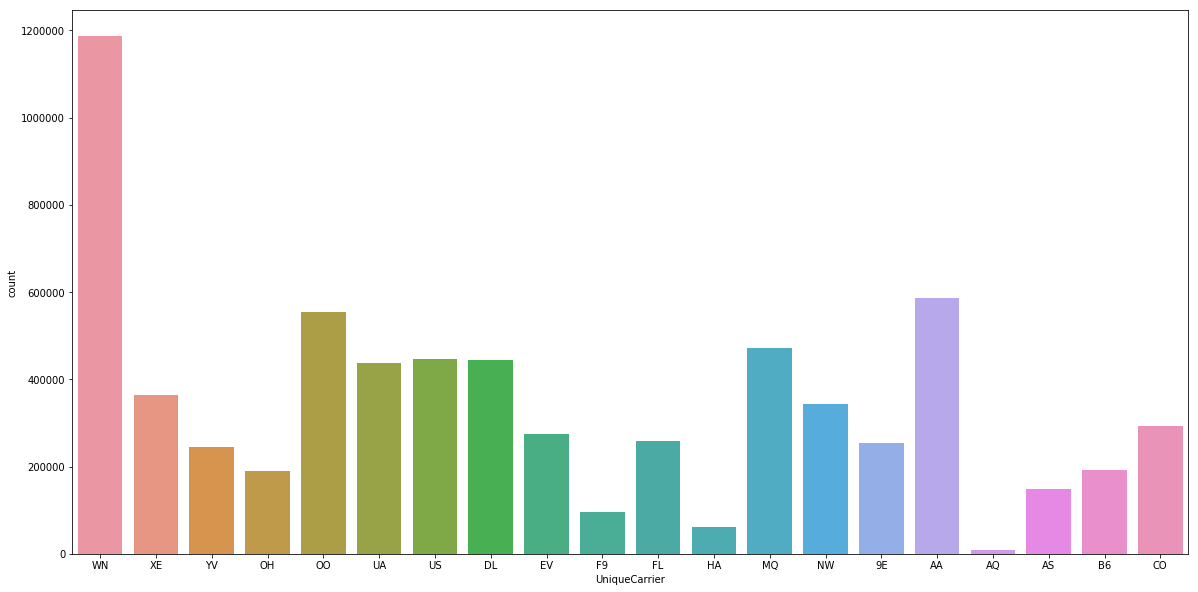

In [22]:
plt.figure(figsize=(20,10))
sb.countplot(dt['UniqueCarrier'])

The graph show that, WN take the most part

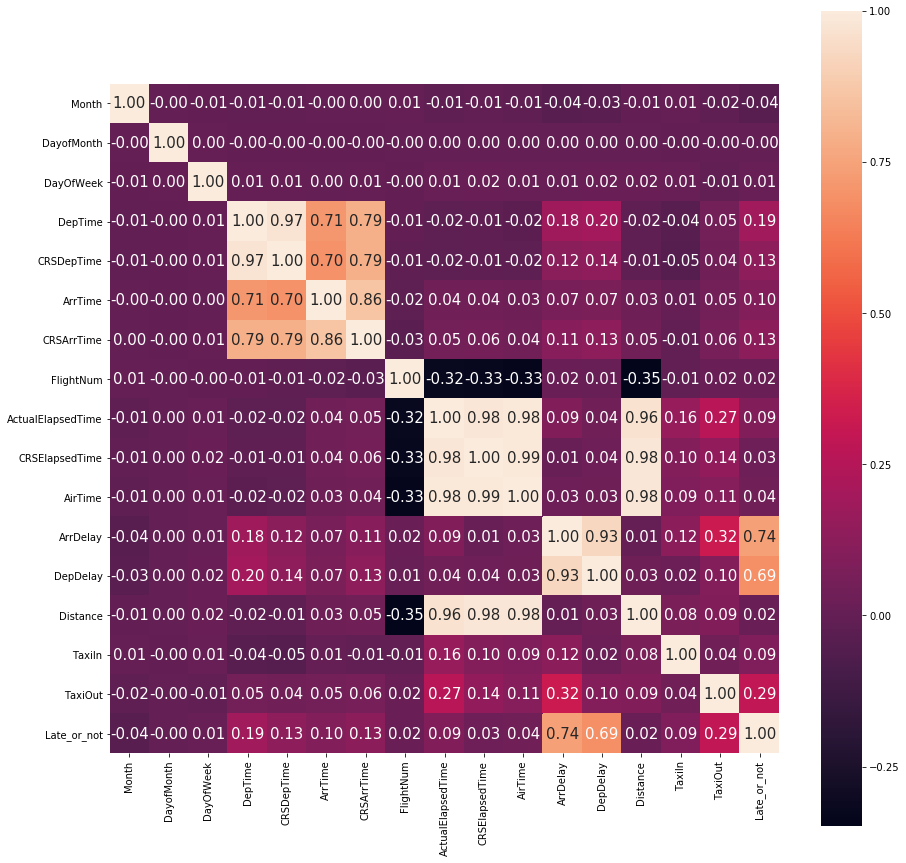

In [23]:
corr = dt.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
        xticklabels=corr.columns,
        yticklabels=corr.columns)

From the correlation figure , feature have most effect on Late_or_not is : 'DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut'.

## 2/ Apply model in Naive Bayes

In [24]:
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3427514, 5) (3427514,)
(3427515, 5) (3427515,)


In [25]:
clf = MultinomialNB()
clf.fit(abs(X_train), y_train)
predicted = clf.predict(X_test)

In [26]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   2977142
          1       0.80      0.80      0.80    450373

avg / total       0.95      0.95      0.95   3427515



## Apply model in Logistic regression.

In [27]:
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)


In [28]:
logisticR = LogisticRegression()
logisticR.fit(X_train, y_train)
predicted = logisticR.predict(X_test)

In [29]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98   2976479
          1       0.91      0.82      0.87    451036

avg / total       0.97      0.97      0.97   3427515



## Decision Tree

In [30]:
dtc=DecisionTreeClassifier()
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [31]:
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   2976960
          1       0.81      0.82      0.82    450555

avg / total       0.95      0.95      0.95   3427515



## Random Forest

In [32]:
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
RFC=RandomForestClassifier()

In [33]:
RFC.fit(X_train, y_train)
predicted = RFC.predict(X_test)
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98   2977119
          1       0.90      0.82      0.86    450396

avg / total       0.96      0.96      0.96   3427515



## Gradient Boosting Classifier

In [34]:
GBC=GradientBoostingClassifier()
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [35]:
GBC.fit(X_train, y_train)
predicted = GBC.predict(X_test)
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98   2976970
          1       0.91      0.84      0.87    450545

avg / total       0.97      0.97      0.97   3427515



## Support Vector Machines

In [36]:
SVM=svm.LinearSVC()
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [37]:
SVM.fit(X_train, y_train)
predicted = SVM.predict(X_test)
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97   2975788
          1       0.75      0.93      0.83    451727

avg / total       0.96      0.95      0.95   3427515



## Using PCA

In [ ]:
pca = PCA(.95)
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
pca.fit(X_train)
pca.fit(X_test)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3427514, 2) (3427514,)
(3427515, 2) (3427515,)


In [ ]:
logisticR = LogisticRegression()
logisticR.fit(X_train, y_train)
predicted = logisticR.predict(X_test)
print(classification_report(y_test,predicted))

## SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
dt.columns

To test feature selection , i will add more feature that not effect Late_or_not by correlation table

In [ ]:
feature_selector = SelectKBest(f_classif, k='all')
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut','Month', 'DayofMonth', 'DayOfWeek','Distance']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)


In [ ]:
classifier = LogisticRegression()
pipeline = Pipeline([
    ("feature_selector", feature_selector),
    ("classifier", classifier)
])
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)
print(classification_report(y_test,predicted))

## With RFE

In [ ]:
selector = RFE(estimator, 5, step=1)
feature_cols=['DepTime','CRSDepTime','CRSArrTime','DepDelay','TaxiOut','Month', 'DayofMonth', 'DayOfWeek','Distance']
X=dt[feature_cols]
y=dt['Late_or_not']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [ ]:
classifier = LogisticRegression()
pipeline = Pipeline([
    ("feature_selector", selector),
    ("classifier", classifier)
])
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)
print(classification_report(y_test,predicted))

## Conclusion

After apply for several model , i think that my feature selection is good , then all result have high score 